# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [1]:
# Dependencias
!pip install fitter
!pip install thinc --upgrade
!pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 432.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    

In [153]:
# Importar dependencias
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [154]:
# Montar gogle drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2. Importar Datos

In [157]:
# Leer archivo
bookings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hotel_bookings.csv')

# 3. Análisis Exploratorio de Datos

In [158]:
# Tipo de dato de la variable
type(bookings)

pandas.core.frame.DataFrame

In [159]:
# Primeras lineas del dataframe
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [160]:
# Nombres de las columnas en formato lista
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [161]:
# Dimensionalidad del dataframe
bookings.shape

(119390, 32)

In [162]:
# El tipo de dato de cada una de las columnas
bookings.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


# 4. Preparación de Datos



In [163]:
# Diccionario para mapear meses
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Crear mes de arribo en valores numericos
bookings['arrival_date_month_int'] = bookings['arrival_date_month'].map(month_mapping).astype('int64')

# Crear fecha de arribo
bookings['arrival_date_dt'] = pd.to_datetime(bookings['arrival_date_year'].astype(str) + '-' + bookings['arrival_date_month_int'].astype(str) + '-' + bookings['arrival_date_day_of_month'].astype(str))
bookings['arrival_date_timestamp'] = bookings['arrival_date_dt'].astype(np.int64) // 10**9


In [164]:
# Crear dias totales de reserva
bookings['stays_total'] = bookings['stays_in_weekend_nights'] + bookings['stays_in_week_nights']

In [165]:
# Crear fecha de salida
bookings['departure_date_dt'] = bookings['arrival_date_dt'] + bookings['stays_total'].apply(pd.Timedelta, unit='D')

In [166]:
# Transformar el tipo de Habitacion
# A -> Doble
# D -> Simple
# Otros valores -> Suite
def transform_room_type(room_type):
  if room_type == 'A':
    return 'Doble'
  elif room_type == 'D':
    return 'Simple'
  else:
    return 'Suite'

bookings['room_type_tr'] = bookings['reserved_room_type'].apply(transform_room_type)

In [167]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_int,arrival_date_dt,arrival_date_timestamp,stays_total,departure_date_dt,room_type_tr
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,7,2015-07-01,1435708800,0,2015-07-01,Suite
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,7,2015-07-01,1435708800,0,2015-07-01,Suite
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,7,2015-07-01,1435708800,1,2015-07-02,Doble
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,7,2015-07-01,1435708800,1,2015-07-02,Doble
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,7,2015-07-01,1435708800,2,2015-07-03,Doble


In [168]:
# Registros con reservas canceladas
bookings['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [169]:
# Registros para el City Hotel
bookings['hotel'].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


In [170]:
# Creo un nuevo dataframe con los registros para City Hotel descartando las reservas canceladas
bookings_city_hotel = bookings[(bookings['hotel'] == 'City Hotel') & (bookings['is_canceled'] == 0)]
bookings_city_hotel.shape

(46228, 38)

In [171]:
yearly_dataframes = {}

# Obtener los años de arribos
unique_years = bookings_city_hotel['arrival_date_year'].unique()

# Crear un dataframe para cada año
for year in unique_years:
  print(year)
  # Filtrar por el año actual
  yearly_data = bookings_city_hotel[bookings_city_hotel['arrival_date_year'] == year]
  # Guardar en un diccionario de dataframes
  yearly_dataframes[year] = yearly_data

2015
2016
2017


In [172]:
yearly_dataframes[2017].shape

(15817, 38)

array([[<Axes: title={'center': 'arrival_date_timestamp'}>]], dtype=object)

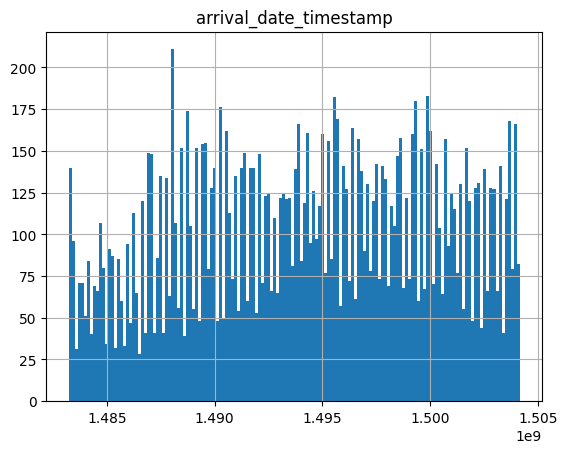

In [173]:
yearly_dataframes[2017].hist('arrival_date_timestamp', bins=150)

### 4.1. Arribo de Huéspedes

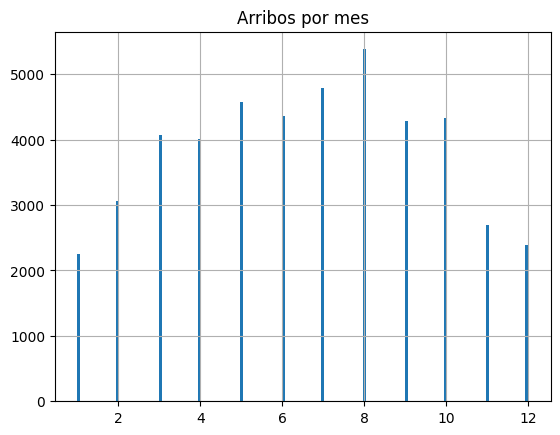

In [174]:
# Histograma para arribo de los huéspedes
bookings_city_hotel.hist('arrival_date_month_int', bins=150)
plt.title('Arribos por mes')
plt.show()

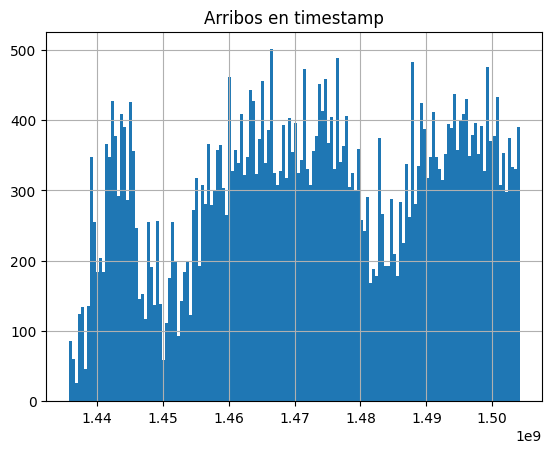

In [175]:
# Histograma para arribo de los huéspedes
bookings_city_hotel.hist('arrival_date_timestamp', bins=150)
plt.title('Arribos en timestamp')
plt.show()

In [176]:
# El método describe() me brinda los estadísticos principales de una columna
bookings_city_hotel['arrival_date_timestamp'].describe()

,arrival_date_timestamp
count,4.622800e+04
mean,1.473004e+09
std,1.884546e+07
min,1.435709e+09
25%,1.458778e+09
50%,1.473206e+09
75%,1.489968e+09
max,1.504138e+09


### 4.2. Duración de la estadia

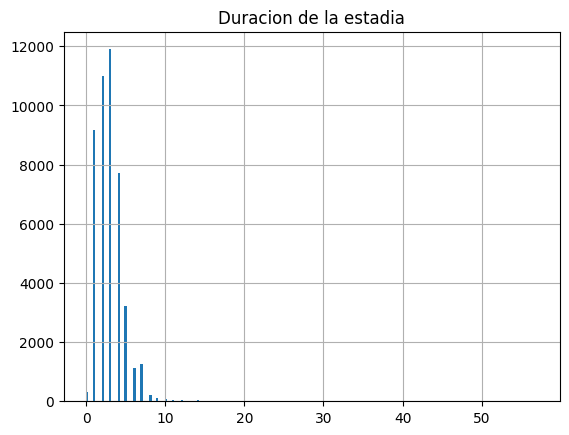

In [177]:
# Histograma para Duración de la estadia
bookings_city_hotel.hist('stays_total', bins=200)
plt.title('Duracion de la estadia')
plt.show()

In [178]:
# Creo un nuevo dataframe con los registros dentro de los 10 dias para eliminar datos anomalos
bookings_city_hotel_stays = bookings_city_hotel[(bookings_city_hotel['stays_total'] > 0) & (bookings_city_hotel['stays_total'] < 8)]

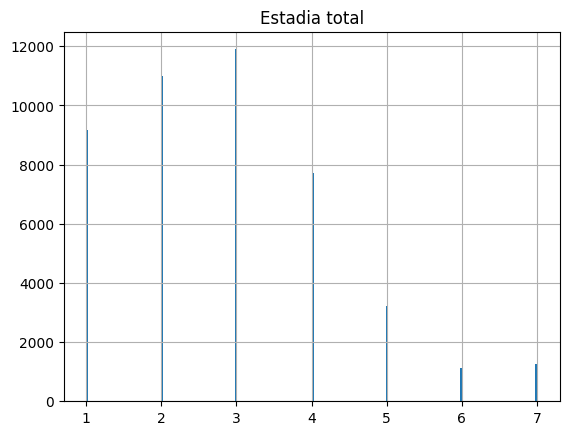

In [179]:
bookings_city_hotel_stays.hist('stays_total', bins=200)
plt.title('Estadia total')
plt.show()

In [180]:
# El método describe() me brinda los estadísticos principales de una columna
bookings_city_hotel_stays['stays_total'].describe()

,stays_total
count,45348.000000
mean,2.849343
std,1.464713
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


### 4.3. Tipo de Habitación

In [181]:
# Calcular el porcentaje de cada tipo de Habitación
bookings_city_hotel['room_type_tr'].value_counts(normalize=True) * 100

,proportion
room_type_tr,
Doble,76.462317
Simple,16.485680
Suite,7.052003


Se descarta calcular una fdp

### 4.4. Cantidad de Bebes en la Reserva

In [182]:
# Calcular el porcentaje de bebes en las reservas
bookings_city_hotel['babies'].value_counts(normalize=True) * 100


,proportion
babies,
0,99.340227
1,0.642468
2,0.012979
10,0.002163
9,0.002163


Se descarta calcular una fdp

### 4.5. Cantidad de niños en la Reserva

In [183]:
# Calcular el porcentaje de niños en las reservas
bookings_city_hotel['children'].value_counts(normalize=True) * 100


,proportion
children,
0.0,92.874448
1.0,4.356667
2.0,2.673704
3.0,0.095180


Se descarta calcular una fdp

# 5. Cálculo de FDPS

### 5.1. Arribo de Huéspedes

In [184]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives = Fitter(bookings_city_hotel.arrival_date_month_int)

##### 2015

In [185]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2015 = Fitter(yearly_dataframes[2015].arrival_date_timestamp)

In [186]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2015.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
vonmises_line,1.117625e-13,3338.403267,3359.241610,0.192583,0.048704,2.880690e-16
nakagami,1.179576e-13,3366.508895,3387.347238,0.179959,0.040799,1.529764e-11
powernorm,1.182059e-13,3366.915205,3387.753548,0.179900,0.041585,5.647295e-12
maxwell,1.186764e-13,3362.367739,3376.259967,0.183941,0.042977,9.252130e-13
pearson3,1.188455e-13,3367.689388,3388.527731,0.180551,0.043489,4.684184e-13


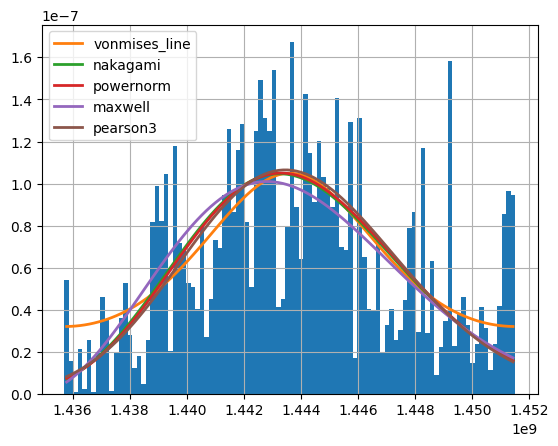

In [187]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2015.summary(5)

In [188]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2015.get_best(method='sumsquare_error')

{'vonmises_line': {'kappa': 0.5920659353977178,
  'loc': 1443614402.5212445,
  'scale': 2516431.528978723}}

In [189]:
fdp_city_hotel_arrives_2015.get_best(method='ks_statistic')

{'weibull_min': {'c': 2.8573099105865833,
  'loc': 1434089570.9227242,
  'scale': 11045354.34440146}}

##### 2016

In [190]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2016 = Fitter(yearly_dataframes[2016].arrival_date_timestamp)

In [191]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2016.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.550044e-15,3466.031371,3498.157663,0.033091,0.012975,9.396685e-04
johnsonsb,5.712818e-15,3468.831905,3500.958196,0.034355,0.011852,3.340735e-03
truncweibull_min,5.938098e-15,3466.461444,3506.619308,0.035764,0.027028,7.345664e-15
semicircular,6.145118e-15,3467.129073,3483.192218,0.035250,0.044744,5.497451e-40
gennorm,6.271819e-15,3469.221803,3493.316522,0.038301,0.029110,3.612431e-17


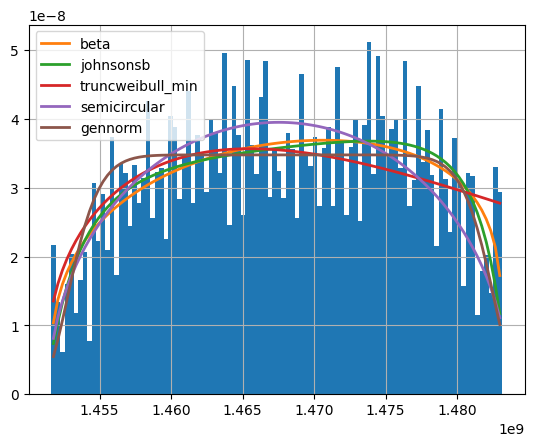

In [192]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2016.summary(5)

In [193]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2016.get_best(method='sumsquare_error')

{'beta': {'a': 1.3340086475855766,
  'b': 1.219853423871962,
  'loc': 1451532324.4767766,
  'scale': 31636621.34806298}}

In [194]:
fdp_city_hotel_arrives_2016.get_best(method='ks_statistic')

{'johnsonsb': {'a': -0.07927778936718151,
  'b': 0.7377228660032845,
  'loc': 1450974103.6452818,
  'scale': 32823406.726344213}}

##### 2017

In [195]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_arrives_2017 = Fitter(yearly_dataframes[2017].arrival_date_timestamp)

In [196]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_arrives_2017.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.864775e-14,3380.763494,3411.438856,0.042668,0.021475,9.082282e-07
powerlaw,1.898677e-14,3378.625366,3401.631888,0.043486,0.023356,6.295703e-08
vonmises_line,2.005234e-14,3378.090328,3401.096850,0.046455,0.048986,2.007077e-33
johnsonsb,2.108938e-14,3382.876908,3413.552270,0.048846,0.022591,1.916986e-07
uniform,2.216600e-14,3375.136136,3390.473817,0.053117,0.060865,2.228871e-51


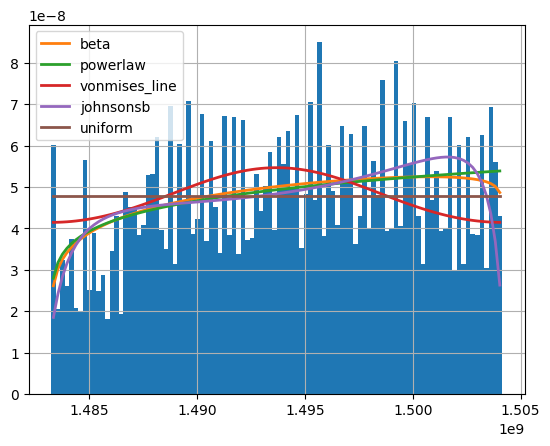

In [197]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_arrives_2017.summary(5)

In [198]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_arrives_2017.get_best(method='sumsquare_error')

{'beta': {'a': 1.1536103619480058,
  'b': 1.0293835847757524,
  'loc': 1483200045.1805675,
  'scale': 20939404.646501724}}

In [199]:
fdp_city_hotel_arrives_2017.get_best(method='ks_statistic')

{'beta': {'a': 1.1536103619480058,
  'b': 1.0293835847757524,
  'loc': 1483200045.1805675,
  'scale': 20939404.646501724}}

#### Simular valores

In [230]:
# Para simular, guardo los valores de los parámetros del 2016 que tiene mas registros
a= 1.3340086475855766,
b= 1.219853423871962,
loc= 1451532324.4767766,
scale= 31636621.34806298

In [231]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f_arrival = stats.beta.rvs(a,b,loc,scale,size=100000).astype(int)

In [232]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f_arrival

array([1474979285, 1472758023, 1460263865, ..., 1473694805, 1480852737,
       1458115746])

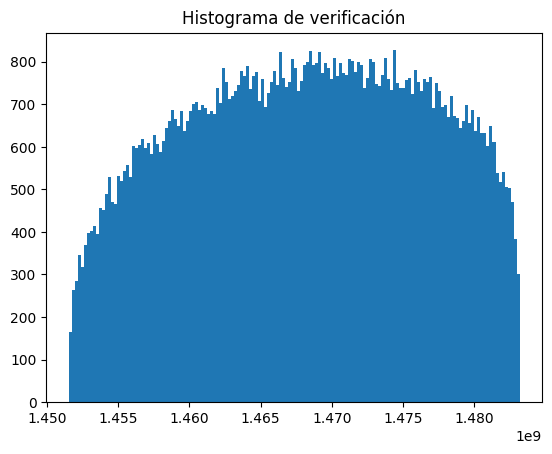

In [233]:
# Histograma de datos de verificación
plt.title("Histograma de verificación")
plt.hist(fdp_f_arrival, bins=150)
plt.show()

In [260]:
# Ordenar timestamps
sorted_arrival_timestamps = np.sort(fdp_f_arrival)

# Calcular las diferencias entre elementos consecutivos en fdp_f (en segundos)
differences_seconds = np.diff(sorted_arrival_timestamps)

# Convertir las diferencias a horas
differences_hours = differences_seconds / 3600  # Dividir por 60 segundos por minuto

# Imprimir o procesar las diferencias en minutos
differences_hours

array([0.34222222, 1.17694444, 0.09111111, ..., 0.59222222, 0.15333333,
       0.24055556])

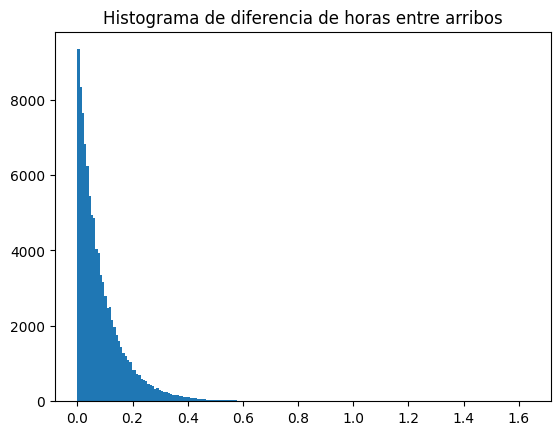

In [261]:
plt.title("Histograma de diferencia de horas entre arribos")
plt.hist(differences_hours, bins=200)
plt.show()

In [262]:
distributions_to_test = ['norm', 'expon', 'gamma', 'uniform']  # Example
# Preparar lo que se quiere ajustar
fdp_arrival_diff = Fitter(differences_hours,distributions=distributions_to_test)

# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_arrival_diff.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.163782,1328.685275,1357.224021,inf,0.007091,8.539774e-05
expon,0.327910,1378.204297,1397.230128,inf,0.012025,5.452727e-13
norm,118.171378,8269.777787,8288.803618,inf,0.174805,0.000000e+00
uniform,318.991614,102.294579,121.320410,inf,0.786948,0.000000e+00


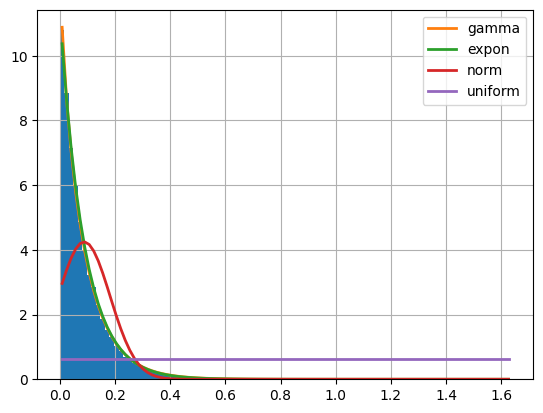

In [263]:
# Summary me muestra el resumen de los mejores ajustes
fdp_arrival_diff.summary(5)

In [264]:
# Obtener la que mejor ajusta con sus parametros
best_fit_params = fdp_arrival_diff.get_best(method='sumsquare_error')
best_fit_dist = list(best_fit_params.keys())[0]

In [265]:
print(best_fit_dist)
print(best_fit_params[best_fit_dist])
# Crear una distribucion utilizando los parametros
dist_object = getattr(stats, best_fit_dist)

# Generar numeros random
random_numbers = dist_object.rvs(**best_fit_params[best_fit_dist], size=30000)
random_numbers

gamma
{'a': 0.9493717645899579, 'loc': -1.1394098234608795e-26, 'scale': 0.09213445691039115}


array([0.1265896 , 0.05971554, 0.05140401, ..., 0.00871977, 0.13366162,
       0.1419522 ])

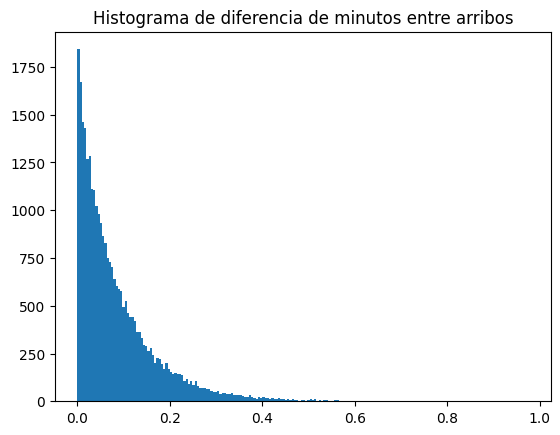

In [251]:
# Histograma de datos de verificación
plt.title("Histograma de diferencia de horas entre arribos")
plt.hist(random_numbers, bins=200)
plt.show()

### 5.2. Duración de la estadia

In [212]:
# Preparar la columna del dataframe que se quiere ajustar
fdp_city_hotel_stays = Fitter(bookings_city_hotel_stays.stays_total)

In [213]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_city_hotel_stays.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,46.905020,619.877226,646.043590,inf,0.610980,0.0
erlang,47.311536,673.638485,699.804849,inf,0.618831,0.0
pareto,48.964447,689.450325,715.616689,inf,0.454693,0.0
beta,51.204121,497.976116,532.864601,inf,0.323069,0.0
lognorm,51.232668,913.703722,939.870086,inf,0.473597,0.0


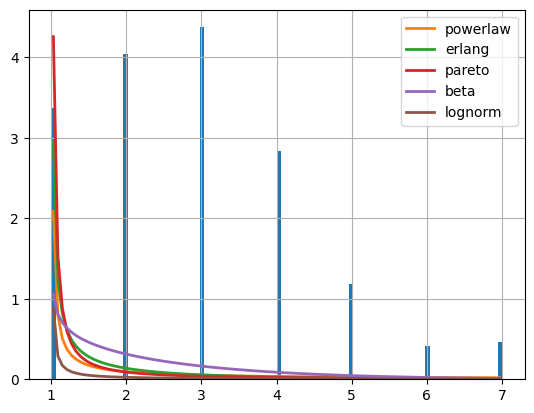

In [214]:
# Summary me muestra el resumen de los mejores ajustes
fdp_city_hotel_stays.summary(5)

In [215]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_city_hotel_stays.get_best(method='sumsquare_error')

{'powerlaw': {'a': 0.11542430442599395,
  'loc': 0.9999999999999999,
  'scale': 6.000000000000001}}

In [216]:
fdp_city_hotel_stays.get_best(method='ks_statistic')

{'vonmises_line': {'kappa': 1.4225484009241454,
  'loc': 2.708944573305667,
  'scale': 1.365885377776983}}

In [217]:
# Para simular, guardo los valores de los parámetros
c= 0.3510566987873381
loc= 2.9999999999999996
scale= 0.9263278639266157

In [221]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter, asegurando valores positivos
fdp_f_stays = stats.dweibull.rvs(c, loc, scale=scale, size=100000).astype(int)
fdp_f_stays = np.clip(fdp_f_stays, 1, 8) # Truncar valores a 0-8

In [222]:
fdp_f_stays

array([1, 1, 2, ..., 3, 3, 3])

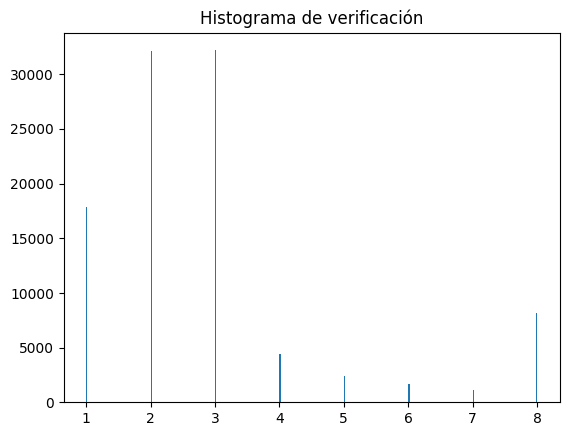

In [220]:
# Histograma de datos de verificación
plt.title("Histograma de verificación")
plt.hist(fdp_f_stays, bins=350)
plt.show()